# Compare Fold-Change and Chi-Squared Results
### Group 33, Florida Atlantic University
- Compare top-ranked features from fold-change and chi-squared feature selection methods.
- Identify overlapping and unique features.
- Save results for biomarker ranking and downstream analysis.

In [6]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2  # You might need to install this: pip install matplotlib-venn

#### Load and Validate Results

In [7]:
# Load results from the new results folder
fold_change_df = pd.read_csv('../results/fold_change_results.csv')
chi2_df = pd.read_csv('../results/chi_squared_features.csv')

# Display basic information about the datasets
print("Fold Change Results:")
print(f"Total features: {len(fold_change_df)}")
print(f"Number of NaN values: {fold_change_df.isna().sum().sum()}")
print("\nFirst few fold change results:")
print(fold_change_df.head())

print("\nChi-squared Results:")
print(f"Total features: {len(chi2_df)}")
print(f"Number of NaN values: {chi2_df.isna().sum().sum()}")
print("\nFirst few chi-squared results:")
print(chi2_df.head())

Fold Change Results:
Total features: 1881
Number of NaN values: 0

First few fold change results:
       Unnamed: 0         0
0    hsa-mir-520a  8.776809
1    hsa-mir-520f  7.479981
2    hsa-mir-518c  7.341205
3  hsa-mir-516b-1  6.974440
4   hsa-mir-512-1  6.891411

Chi-squared Results:
Total features: 1881
Number of NaN values: 490

First few chi-squared results:
        Feature  Chi2_Score       P_Value
0   hsa-mir-571   71.190977  1.272047e-14
1  hsa-mir-4663   38.356704  9.458739e-08
2  hsa-mir-3973   34.193548  6.800901e-07
3  hsa-mir-8082   34.193548  6.800901e-07
4  hsa-mir-451b   18.508169  9.815199e-04


#### Prepare Data for Comparison

In [8]:
# Standardize feature names and scores
fold_change_df['Feature'] = fold_change_df.iloc[:, 0]  # First column contains feature names
fold_change_df['Score'] = fold_change_df.iloc[:, 1]    # Second column contains scores
fold_change_df = fold_change_df[['Feature', 'Score']]

# Filter significant features from chi-squared results
significant_chi2 = chi2_df[chi2_df['P_Value'] < 0.05].copy()
print(f"Number of statistically significant features (p < 0.05): {len(significant_chi2)}")

# Get top features from each method
top_n = 100  # Adjust this number as needed
top_fold_change = fold_change_df.head(top_n)['Feature'].tolist()
top_chi2 = significant_chi2.head(top_n)['Feature'].tolist()

print(f"\nNumber of top features selected from each method: {top_n}")
print(f"Number of features in fold change selection: {len(top_fold_change)}")
print(f"Number of features in chi-squared selection: {len(top_chi2)}")

Number of statistically significant features (p < 0.05): 10

Number of top features selected from each method: 100
Number of features in fold change selection: 100
Number of features in chi-squared selection: 10


#### Find and Analyze Overlapping Features

In [9]:
# Find overlapping features
overlapping_features = set(top_fold_change).intersection(set(top_chi2))

print(f"Number of overlapping features: {len(overlapping_features)}")
print("\nOverlapping features:")
for feature in overlapping_features:
    fold_change_score = fold_change_df[fold_change_df['Feature'] == feature]['Score'].iloc[0]
    chi2_score = chi2_df[chi2_df['Feature'] == feature]['Chi2_Score'].iloc[0]
    print(f"\n{feature}:")
    print(f"  Fold Change Score: {fold_change_score:.3f}")
    print(f"  Chi-squared Score: {chi2_score:.3f}")

Number of overlapping features: 0

Overlapping features:


#### Visualize Results

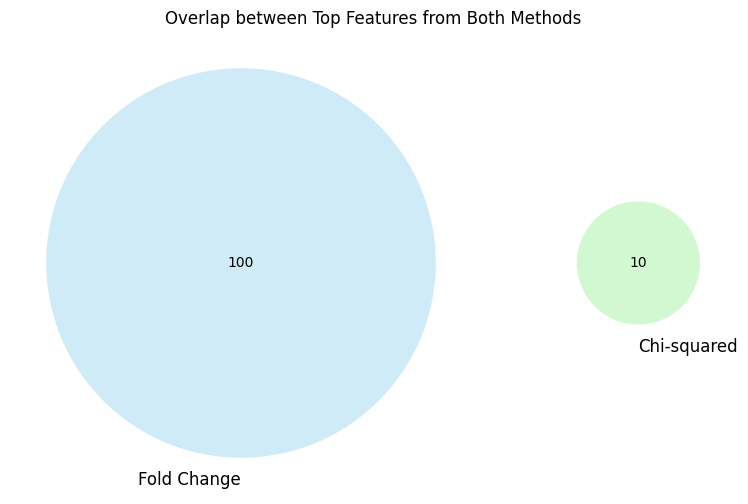

In [10]:
# Create Venn diagram of overlap
plt.figure(figsize=(10, 6))
venn2([set(top_fold_change), set(top_chi2)],
      set_labels=('Fold Change', 'Chi-squared'),
      set_colors=('skyblue', 'lightgreen'))
plt.title('Overlap between Top Features from Both Methods')
plt.show()

# Create scatter plot of scores for overlapping features
if len(overlapping_features) > 0:
    overlap_data = []
    for feature in overlapping_features:
        fold_change_score = fold_change_df[fold_change_df['Feature'] == feature]['Score'].iloc[0]
        chi2_score = chi2_df[chi2_df['Feature'] == feature]['Chi2_Score'].iloc[0]
        overlap_data.append({'Feature': feature, 
                            'Fold Change Score': fold_change_score,
                            'Chi-squared Score': chi2_score})
    
    overlap_df = pd.DataFrame(overlap_data)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(overlap_df['Fold Change Score'], 
                overlap_df['Chi-squared Score'],
                alpha=0.6)
    
    for i, txt in enumerate(overlap_df['Feature']):
        plt.annotate(txt, (overlap_df['Fold Change Score'].iloc[i], 
                          overlap_df['Chi-squared Score'].iloc[i]))
        
    plt.xlabel('Fold Change Score')
    plt.ylabel('Chi-squared Score')
    plt.title('Score Comparison for Overlapping Features')
    plt.show()

#### Save Results

In [11]:
# Create a comprehensive results dictionary
results = {
    'overlapping_features': list(overlapping_features),
    'unique_to_fold_change': list(set(top_fold_change) - set(top_chi2)),
    'unique_to_chi_squared': list(set(top_chi2) - set(top_fold_change))
}

# Save detailed results
import json
with open('../results/feature_comparison_results.json', 'w') as f:
    json.dump(results, f, indent=4)

# Create and save a summary DataFrame
summary_data = {
    'Method': ['Fold Change', 'Chi-squared', 'Overlap'],
    'Number of Features': [len(top_fold_change), 
                          len(top_chi2), 
                          len(overlapping_features)]
}
summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('../results/feature_comparison_summary.csv', index=False)

print("Results saved to:")
print("- ../results/feature_comparison_results.json")
print("- ../results/feature_comparison_summary.csv")

# Display summary
print("\nSummary:")
print(summary_df)

Results saved to:
- ../results/feature_comparison_results.json
- ../results/feature_comparison_summary.csv

Summary:
        Method  Number of Features
0  Fold Change                 100
1  Chi-squared                  10
2      Overlap                   0
